In [171]:
# import tensorflow as tf
# print(tf.__version__)

In [172]:
## impport some basic libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [173]:
dataset = pd.read_csv("/content/Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [174]:
## Divide the dataset into independent and dependent features

X = dataset.iloc[:, 3:13]
y= dataset.iloc[:, 13]

In [175]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [176]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [177]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'], drop_first=True, dtype=int)
gender = pd.get_dummies(X['Gender'], drop_first=True, dtype=int)

In [178]:
## Cocatenate these variables with dataframe
X=X.drop(['Geography', 'Gender'], axis=1)

In [179]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [180]:
pd.concat([X,geography,gender], axis=1).head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [181]:
## Splitting the dataset into Traning set and Test set
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [182]:
## feature scaling

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [183]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-2.30455945,  0.30102557, -1.37744033, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [-1.19119591, -0.94312892, -1.031415  , ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-0.62420521, -0.08179119,  1.39076231, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-0.28401079,  0.87525072, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.32472465]])

In [184]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  0.64259497,
         0.9687384 ,  1.61085707],
       [-1.31490297,  0.10961719, -1.031415  , ...,  0.64259497,
        -1.03227043,  0.49587037],
       [ 0.57162971,  0.30102557,  1.04473698, ...,  0.64259497,
         0.9687384 , -0.42478674],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ...,  0.64259497,
        -1.03227043,  0.71888467],
       [-0.00566991, -0.46460796, -0.33936434, ...,  0.64259497,
         0.9687384 , -1.54507805],
       [-0.79945688, -0.84742473,  1.04473698, ...,  0.64259497,
        -1.03227043,  1.61255917]])

In [185]:
X_train.shape

(8000, 8)

In [186]:
## Part 2 Now lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [187]:
## Lets initalize the ANN
classifier=Sequential()

In [188]:
## Adding the input layer
classifier.add(Dense( units=8,activation='relu')) #relu is applied to next layer

In [189]:
## Adding the first hidden layer
classifier.add(Dense(units=5,activation='relu'))
classifier.add(Dropout(0.2))

In [190]:
## Adding the second hidden layer
classifier.add(Dense(units=4,activation='relu'))
classifier.add(Dropout(0.3))

In [191]:
## Adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [192]:
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)
classifier.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [193]:
## Early Stopping
import tensorflow as tf
early_stoping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [194]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stoping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7849 - loss: 0.5692 - val_accuracy: 0.7955 - val_loss: 0.5068
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8046 - loss: 0.4921 - val_accuracy: 0.7955 - val_loss: 0.4619
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7985 - loss: 0.4731 - val_accuracy: 0.8099 - val_loss: 0.4346
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8061 - loss: 0.4572 - val_accuracy: 0.8148 - val_loss: 0.4311
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7998 - loss: 0.4617 - val_accuracy: 0.8129 - val_loss: 0.4322
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8167 - loss: 0.4379 - val_accuracy: 0.8164 - val_loss: 0.4261
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8037 - loss: 0.4500 - val_accuracy: 0.8160 - val_loss: 0.4193
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8099 - loss: 0.4466 - 

In [195]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

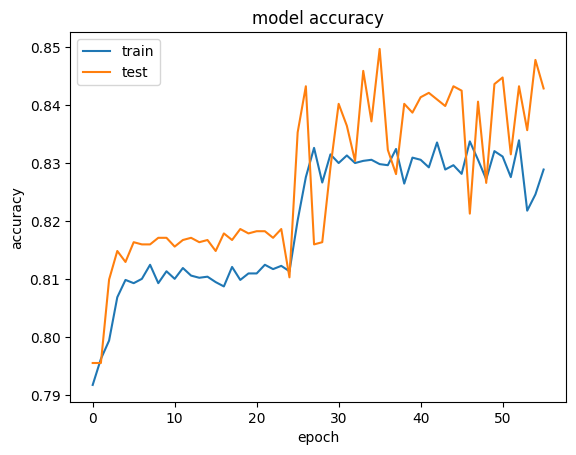

In [196]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

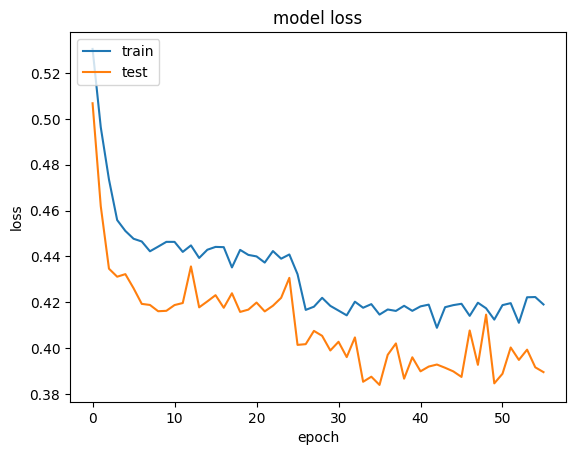

In [197]:
# summarize history for accuracy
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [198]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred >= 0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [199]:
## make the confusion matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1577,   18],
       [ 281,  124]])

In [200]:
## Calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8505

In [201]:
## get the weights
classifier.get_weights()

[array([[ 0.36440435, -0.14960948, -0.3108242 ,  0.8121222 ,  0.57787377,
         -0.1602676 , -1.015768  , -0.10248032],
        [ 0.18826427,  2.195212  ,  0.92849654, -0.9321094 ,  1.7292945 ,
          3.502021  , -1.3685946 ,  1.3853493 ],
        [ 0.22663417,  0.01499756, -0.8556225 , -0.7240648 ,  0.19899651,
          0.426959  ,  0.04382872, -0.01627265],
        [-3.0223918 , -0.58601743, -2.1603901 ,  0.06255122, -1.9252254 ,
          0.3285129 ,  0.02213991,  0.17627957],
        [ 0.7159568 , -1.4075361 , -3.7945035 ,  0.6638437 , -0.56097203,
         -2.8527772 ,  0.303384  ,  3.7931156 ],
        [-0.45125768, -0.0584782 ,  0.30694675,  0.67999536,  0.08766827,
         -0.39136392, -0.38368016, -0.14300288],
        [ 0.45859694,  3.110754  , -0.68587786,  1.2057267 ,  0.25156847,
         -1.4919121 ,  0.80920154, -0.22840439],
        [-0.08140992, -0.09447826, -0.96404725,  0.6021348 ,  0.80008084,
          0.40761358, -1.3441153 ,  0.22518489]], dtype=float32),